In [1]:
import pandas as pd
import numpy as np
import os
import folium
from folium import IFrame
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
import plotly.graph_objects as go
from io import BytesIO
import base64

In [2]:
df = pd.read_csv(os.path.join('data', 'operacoes-financiamento-operacoes-indiretas-automaticas.csv'), sep = ';', decimal = ',')

1 ) Descrição dos dados:

Informações detalhadas sobre as operações indiretas contratadas de forma automática.
 Nas operações indiretas, a análise do financiamento é feita pela instituição financeira credenciada, que assume o risco de não pagamento da operação.
 É ela também que negocia com o cliente as condições do financiamento, como prazo de pagamento, spread de risco e garantias exigidas, respeitando algumas regras
 e limites definidos pelo BNDES. Não foram incluídas nesta listagem as operações do Cartão BNDES e nem as contratadas com Pessoas Físicas. Dados, em reais, a partir de 2002.

 Fonte: https://dadosabertos.bndes.gov.br/dataset/operacoes-financiamento/resource/9534f677-9525-4bf8-a3aa-fd5d3e152a93


In [3]:
df.shape, df.columns

((2083363, 30),
 Index(['cliente', 'cpf_cnpj', 'uf', 'municipio', 'municipio_codigo',
        'data_da_contratacao', 'valor_da_operacao_em_reais',
        'valor_desembolsado_reais', 'fonte_de_recurso_desembolsos',
        'custo_financeiro', 'juros', 'prazo_carencia_meses',
        'prazo_amortizacao_meses', 'modalidade_de_apoio', 'forma_de_apoio',
        'produto', 'instrumento_financeiro', 'inovacao', 'area_operacional',
        'setor_cnae', 'subsetor_cnae_agrupado', 'subsetor_cnae_codigo',
        'subsetor_cnae_nome', 'setor_bndes', 'subsetor_bndes',
        'porte_do_cliente', 'natureza_do_cliente',
        'instituicao_financeira_credenciada', 'cnpj_do_agente_financeiro',
        'situacao_da_operacao'],
       dtype='object'))

In [4]:
df.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083363 entries, 0 to 2083362
Data columns (total 30 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   cliente                             2083363 non-null  object 
 1   cpf_cnpj                            2083363 non-null  object 
 2   uf                                  2083363 non-null  object 
 3   municipio                           2083363 non-null  object 
 4   municipio_codigo                    2083363 non-null  int64  
 5   data_da_contratacao                 2083363 non-null  object 
 6   valor_da_operacao_em_reais          2083363 non-null  int64  
 7   valor_desembolsado_reais            2080426 non-null  float64
 8   fonte_de_recurso_desembolsos        2083363 non-null  object 
 9   custo_financeiro                    2083363 non-null  object 
 10  juros                               2082927 non-null  float64
 11  prazo_caren

In [5]:
df.head()

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,...,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao_da_operacao
0,BANCO COOPERATIVO SICOOB S.A.,**.*38.232/0001-**,SP,PEDREGULHO,3537008,2002-01-02,16000,16000.0,RECURSOS LIVRES - TESOURO,TAXA FIXA,...,Agropecuária,A0119900,CULT PLANTAS LAVOURA TEMPORARIA NAO ESPECIFICA...,AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO COOPERATIVO SICOOB S.A.,02.038.232.0001-64,LIQUIDADA
1,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,TRES DE MAIO,4321808,2002-01-02,8047,8047.0,RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
2,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,8104,8104.0,RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
3,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,6304,6304.0,RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
4,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,HUMAITA,4309704,2002-01-02,15000,15000.0,RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA


2.1.1) Número de financiamentos por estado

In [6]:
estados, contador = np.unique(df.uf, return_counts = True)
dict_uf = dict(zip(estados, contador))
sorted_dict_uf = sorted(dict_uf.items(), key = lambda key_value: key_value[1], reverse = True)
for i in sorted_dict_uf: print(i[0], '   ', i[1])

 SP     434734
 RS     288488
 PR     275219
 MG     232436
 SC     216139
 RJ     79365
 GO     73032
 BA     72898
 ES     62616
 MT     53894
 PE     49772
 CE     33254
 MS     32311
 PA     29550
 MA     22230
 RO     19500
 TO     16533
 DF     14455
 AM     13602
 PB     13206
 RN     12941
 AL     9888
 PI     9797
 SE     8564
 AC     4520
 AP     2366
 RR     2053


2.1.2) Representação gráfica

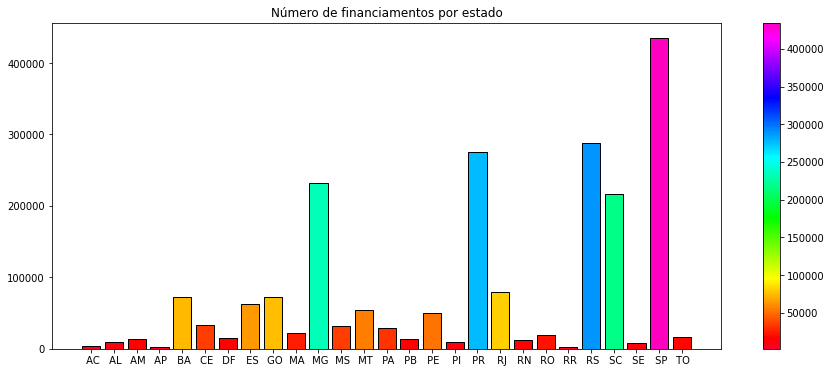

In [7]:
warnings.filterwarnings('ignore', category=plt.cbook.MatplotlibDeprecationWarning)

plt.figure(figsize=(15,6))

cores = cm.gist_rainbow(1.*contador/max(contador))
plot = plt.scatter(contador, contador, c = contador, cmap = 'gist_rainbow')
plt.clf()
plt.colorbar(plot)
plt.title('Número de financiamentos por estado')
plt.bar(estados, contador, color = cores, edgecolor = 'black')

plt.show()

2.2) Número de financiamentos por porte da empresa

In [8]:
porte_empresa, contador = np.unique(df.porte_do_cliente, return_counts = True)
dict_porte = dict(zip(porte_empresa, contador))
sorted_dict_porte = sorted(dict_porte.items(), key = lambda key_value: key_value[1], reverse = True)
print('Número de financiamentos por porte da empresa:')
for i in sorted_dict_porte: print(i[0], '   ', i[1])

Número de financiamentos por porte da empresa:
MICRO     948294
PEQUENA     428387
GRANDE     364372
MÉDIA     342310


2.3) Número de financiamentos por porte da empresa por estado

In [9]:
financiamentos_porte_estado = df[['uf', 'porte_do_cliente']].sort_values(by = ['uf'])

conjuntos, contador = np.unique(np.array(financiamentos_porte_estado).astype('<U22'), return_counts= True, axis = 0)
print('Número de financiamentos separados por estado e porte da empresa:')
for i in range(len(conjuntos)):
    if i % 4 == 0: print('-------------------------')
    print(conjuntos[i][0], '   ', conjuntos[i][1], '   ', contador[i])

Número de financiamentos separados por estado e porte da empresa:
-------------------------
 AC     GRANDE     158
 AC     MICRO     2656
 AC     MÉDIA     708
 AC     PEQUENA     998
-------------------------
 AL     GRANDE     2076
 AL     MICRO     4087
 AL     MÉDIA     1629
 AL     PEQUENA     2096
-------------------------
 AM     GRANDE     2125
 AM     MICRO     3483
 AM     MÉDIA     3831
 AM     PEQUENA     4163
-------------------------
 AP     GRANDE     233
 AP     MICRO     777
 AP     MÉDIA     618
 AP     PEQUENA     738
-------------------------
 BA     GRANDE     10663
 BA     MICRO     30074
 BA     MÉDIA     14235
 BA     PEQUENA     17926
-------------------------
 CE     GRANDE     4872
 CE     MICRO     12477
 CE     MÉDIA     7087
 CE     PEQUENA     8818
-------------------------
 DF     GRANDE     2546
 DF     MICRO     5115
 DF     MÉDIA     2896
 DF     PEQUENA     3898
-------------------------
 ES     GRANDE     7987
 ES     MICRO     34488
 ES     MÉDIA  

3.1.1) Número de financiamentos anuais

In [10]:
contratacoes_anuais = pd.to_datetime(df.data_da_contratacao).dt.strftime('%Y')

data, contador = np.unique(contratacoes_anuais, return_counts = True)
data = pd.to_datetime(data, format = "%Y").strftime('%Y')

print('Número de financiamentos por ano:')
for i in range(len(data)): print(data[i], '   ', contador[i])

Número de financiamentos por ano:
2002     65893
2003     65479
2004     87546
2005     85206
2006     69429
2007     97439
2008     111238
2009     140111
2010     209476
2011     237983
2012     208995
2013     193584
2014     172939
2015     86293
2016     52833
2017     61368
2018     46482
2019     31477
2020     46791
2021     12801


3.1.2) Representação gráfica:

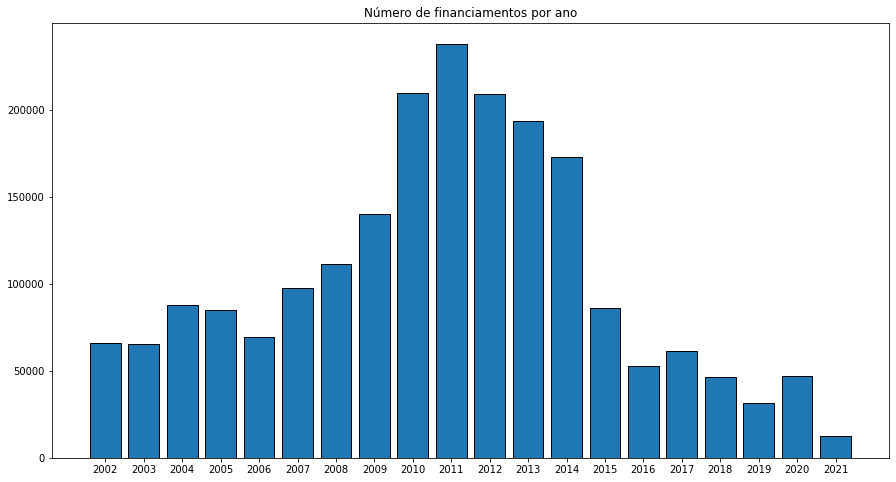

In [11]:
plt.figure(figsize = (15,8))
plt.bar(data, contador, edgecolor = 'black')
plt.title('Número de financiamentos por ano')
plt.show()

3.2.1) Número de financiamentos por ano e porte da empresa:

In [20]:
financiamentos_porte_ano = df[['data_da_contratacao', 'porte_do_cliente']].sort_values(by = ['data_da_contratacao'])
financiamentos_porte_ano.data_da_contratacao = pd.to_datetime(financiamentos_porte_ano.data_da_contratacao, format = '%Y-%m-%d').dt.strftime('%Y')

conjuntos, contador = np.unique(np.array(financiamentos_porte_ano).astype('<U22'), return_counts= True, axis = 0)
print('Número de financiamentos separados por ano e porte da empresa:')
for i in range(len(conjuntos)):
    if i % 4 == 0: print('-------------------------')
    print(conjuntos[i][0], '   ', conjuntos[i][1], '   ', contador[i])

Número de financiamentos separados por ano e porte da empresa:
-------------------------
2002     GRANDE     5045
2002     MICRO     48097
2002     MÉDIA     4718
2002     PEQUENA     8033
-------------------------
2003     GRANDE     4777
2003     MICRO     43548
2003     MÉDIA     5898
2003     PEQUENA     11256
-------------------------
2004     GRANDE     5870
2004     MICRO     67306
2004     MÉDIA     6304
2004     PEQUENA     8066
-------------------------
2005     GRANDE     8053
2005     MICRO     59246
2005     MÉDIA     7791
2005     PEQUENA     10116
-------------------------
2006     GRANDE     9976
2006     MICRO     40997
2006     MÉDIA     8284
2006     PEQUENA     10172
-------------------------
2007     GRANDE     18103
2007     MICRO     49632
2007     MÉDIA     13639
2007     PEQUENA     16065
-------------------------
2008     GRANDE     21324
2008     MICRO     49770
2008     MÉDIA     18038
2008     PEQUENA     22106
-------------------------
2009     GRANDE     

3.2.2) Representação gráfica:

In [42]:
fig = go.Figure()
fig.update_layout(title = 'Distribuição anual de financiamentos por porte da empresa')

micro, pequena, media, grande = [], [], [], []
for i in range(len(conjuntos)):
    if 'MICRO' in conjuntos[i]: micro.append(contador[i])
    elif 'PEQUENA' in conjuntos[i]: pequena.append(contador[i])
    elif 'MÉDIA' in conjuntos[i]: media.append(contador[i])
    elif 'GRANDE' in conjuntos[i]: grande.append(contador[i])


for step in np.arange(len(data)):
    fig.add_trace(
        go.Pie(labels = ['Micro', 'Pequena', 'Média', 'Grande'],
               values = [micro[step], pequena[step], media[step], grande[step]], sort = False, visible = False))

fig.data[10].visible = True

steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Distribuição anual de financiamentos por porte da empresa"}], 
    )
    step["args"][0]["visible"][i] = True 
    steps.append(step)

sliders = [dict(active = 10, steps = steps)]

fig.update_layout(sliders = sliders)
fig.update_traces(hoverinfo = 'label+value')

fig['layout']['sliders'][0]['currentvalue']['prefix']='Ano: '
for i, ano in enumerate(data, start = 0):
    fig['layout']['sliders'][0]['steps'][i]['label']=ano

fig.show()

4 ) Gráficos para visualização no mapa 

OBS: Incompleto. Por enquanto foi feito um gráfico de financiamentos por ano para o estado de São Paulo para demonstração

Número de financiamentos por ano no estado de São Paulo:
2002     8408
2003     11050
2004     9178
2005     12240
2006     13605
2007     20435
2008     23831
2009     27834
2010     48426
2011     56401
2012     44418
2013     41839
2014     37021
2015     20064
2016     14895
2017     17158
2018     11048
2019     5546
2020     8760
2021     2577


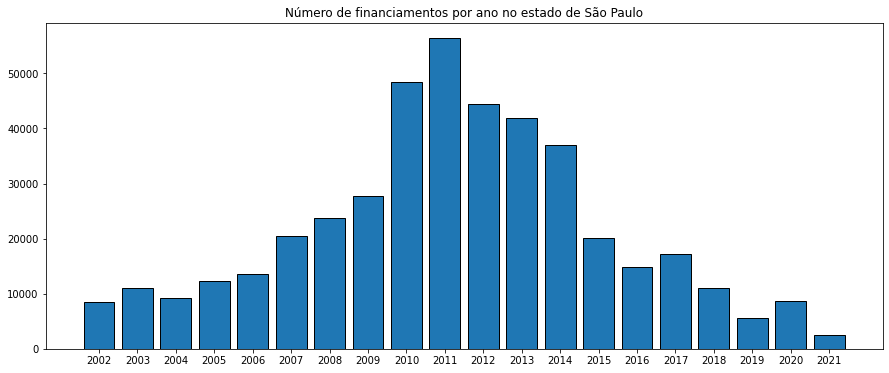

In [88]:
# Financiamentos para empresas do estado de São Paulo ao longo do tempo

financiamentos_sp_ano = df[(df.uf == ' SP') & (df.data_da_contratacao)]
financiamentos_sp_ano = financiamentos_sp_ano[['uf', 'data_da_contratacao']]

data = pd.to_datetime(financiamentos_sp_ano.data_da_contratacao, format = '%Y-%m-%d').dt.strftime('%Y')

ano, contador = np.unique(data, return_counts = True)
ano = pd.to_datetime(ano, format = "%Y").strftime('%Y')

print('Número de financiamentos por ano no estado de São Paulo:')
for i in range(len(ano)): print(ano[i], '   ', contador[i])

fig_sp = plt.figure(figsize = (15,6))
plt.bar(ano, contador, edgecolor = 'black')
plt.title('Número de financiamentos por ano no estado de São Paulo')
plt.show()


tmpfile_sp = BytesIO()
fig_sp.savefig(tmpfile_sp, format = 'png')
encoded = base64.b64encode(tmpfile_sp.getvalue()).decode('utf-8')

html_sp = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)

iframe = IFrame(html_sp, width = 1200, height = 550)
popup = folium.Popup(iframe, max_width= 2000)


Representação dos dados em um mapa

Import dos arquivos geodata para os estados do Brasil

Fonte: https://github.com/tbrugz/geodata-br

In [4]:
with open(os.path.join('data/json', 'sp.json'), encoding='utf8') as sp_json:
    SP = json.load(sp_json)
with open(os.path.join('data/json', 'rs.json'), encoding='utf8') as rs_json:
    RS = json.load(rs_json)
with open(os.path.join('data/json', 'pr.json'), encoding='utf8') as pr_json:
    PR = json.load(pr_json)
with open(os.path.join('data/json', 'mg.json'), encoding='utf8') as mg_json:
    MG = json.load(mg_json)
with open(os.path.join('data/json', 'sc.json'), encoding='utf8') as sc_json:
    SC = json.load(sc_json)
with open(os.path.join('data/json', 'rj.json'), encoding='utf8') as rj_json:
    RJ = json.load(rj_json)
with open(os.path.join('data/json', 'go.json'), encoding='utf8') as go_json:
    GO = json.load(go_json)
with open(os.path.join('data/json', 'ba.json'), encoding='utf8') as ba_json:
    BA = json.load(ba_json)
with open(os.path.join('data/json', 'es.json'), encoding='utf8') as es_json:
    ES = json.load(es_json)

"with open(os.path.join('dados', 'rs.json'), encoding='utf8') as rs_json:\n    RS = json.load(rs_json)\nwith open(os.path.join('dados', 'pr.json'), encoding='utf8') as pr_json:\n    PR = json.load(pr_json)\nwith open(os.path.join('dados', 'mg.json'), encoding='utf8') as mg_json:\n    MG = json.load(mg_json)\nwith open(os.path.join('dados', 'sc.json'), encoding='utf8') as sc_json:\n    SC = json.load(sc_json)\nwith open(os.path.join('dados', 'rj.json'), encoding='utf8') as rj_json:\n    RJ = json.load(rj_json)\nwith open(os.path.join('dados', 'go.json'), encoding='utf8') as go_json:\n    GO = json.load(go_json)\nwith open(os.path.join('dados', 'ba.json'), encoding='utf8') as ba_json:\n    BA = json.load(ba_json)\nwith open(os.path.join('dados', 'es.json'), encoding='utf8') as es_json:\n    ES = json.load(es_json)"

In [89]:
def highlight_function(feature):
    return {'fillColor':'00008B'}

estilos = {'terrain':'Stamen Terrain', 'dark':'CartoDB dark_matter', 'positron':'CartoDB positron', 'toner':'Stamen Toner', 'water':'Stamen Watercolor'}
m = folium.Map(location = [-15.639513, -46.076170], zoom_start = 5, tiles = estilos['terrain'])

In [90]:
folium_sp = folium.GeoJson(SP, highlight_function = highlight_function, tooltip ='São Paulo', style_function = lambda x:{'fillColor':'#D2691E', 'color':'#0000FF', 'weight': 0.1})
popup.add_to(folium_sp)
folium_sp.add_to(m)

folium.GeoJson(RS, highlight_function = highlight_function, tooltip ='Rio Grande do Sul', style_function = lambda x:{'fillColor':'#FF1111', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(PR, highlight_function = highlight_function, tooltip ='Paraná', style_function = lambda x:{'fillColor':'#00FFFF', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(MG, highlight_function = highlight_function, tooltip ='Minas Gerais', style_function = lambda x:{'fillColor':'#00FD00', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(SC, highlight_function = highlight_function, tooltip ='Santa Catarina', style_function = lambda x:{'fillColor':'#AD9800', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(RJ, highlight_function = highlight_function, tooltip ='Rio de Janeiro', style_function = lambda x:{'fillColor':'#AD98D9', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(GO, highlight_function = highlight_function, tooltip ='Goiás', style_function = lambda x:{'fillColor':'#49E68C', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(BA, highlight_function = highlight_function, tooltip ='Bahia', style_function = lambda x:{'fillColor':'#498C8C', 'color':'#0000FF', 'weight': 0.1}).add_to(m)
folium.GeoJson(ES, highlight_function = highlight_function, tooltip ='Espírito Santo', style_function = lambda x:{'fillColor':'#9B4648', 'color':'#0000FF', 'weight': 0.1}).add_to(m)

In [91]:
m.save('mapa_financiamentos.html')